In [9]:
import numpy as np
import pandas as pd
import os,os.path
import cv2
import matplotlib.pyplot as plt

In [10]:
classes={"no_tumor":0,"pituitary_tumor":1}

In [14]:
import cv2
X = []
Y = []
for cls in classes:
    path1 = "C:/Users/pushpa/Downloads/data/Training"
    pth=os.path.join(path1,cls)
    print(pth)
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j)
        img =cv2.resize(img,(200,200))
        X.append(img)
        
        Y.append(classes[cls])

C:/Users/pushpa/Downloads/data/Training\no_tumor
C:/Users/pushpa/Downloads/data/Training\pituitary_tumor


In [15]:
np.unique(Y)

array([0, 1])

In [16]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)

X_updated = X.reshape(len(X), -1)
print(X_updated.shape)

(1222, 200, 200, 3)
(1222, 120000)


In [17]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [18]:
print(os.listdir(pth))

['p (1).jpg', 'p (10).jpg', 'p (100).jpg', 'p (101).jpg', 'p (102).jpg', 'p (103).jpg', 'p (104).jpg', 'p (105).jpg', 'p (106).jpg', 'p (107).jpg', 'p (108).jpg', 'p (109).jpg', 'p (11).jpg', 'p (110).jpg', 'p (111).jpg', 'p (112).jpg', 'p (113).jpg', 'p (114).jpg', 'p (115).jpg', 'p (116).jpg', 'p (117).jpg', 'p (118).jpg', 'p (119).jpg', 'p (12).jpg', 'p (120).jpg', 'p (121).jpg', 'p (122).jpg', 'p (123).jpg', 'p (124).jpg', 'p (125).jpg', 'p (126).jpg', 'p (127).jpg', 'p (128).jpg', 'p (129).jpg', 'p (13).jpg', 'p (130).jpg', 'p (131).jpg', 'p (132).jpg', 'p (133).jpg', 'p (134).jpg', 'p (135).jpg', 'p (136).jpg', 'p (137).jpg', 'p (138).jpg', 'p (139).jpg', 'p (14).jpg', 'p (140).jpg', 'p (141).jpg', 'p (142).jpg', 'p (143).jpg', 'p (144).jpg', 'p (145).jpg', 'p (146).jpg', 'p (147).jpg', 'p (148).jpg', 'p (149).jpg', 'p (15).jpg', 'p (150).jpg', 'p (151).jpg', 'p (152).jpg', 'p (153).jpg', 'p (154).jpg', 'p (155).jpg', 'p (156).jpg', 'p (157).jpg', 'p (158).jpg', 'p (159).jpg', 'p

In [19]:
len(X)

1222

In [20]:
X=np.array(X)
Y=np.array(Y)
print(Y.ndim)
print(X.shape)
print(Y.shape)

1
(1222, 200, 200, 3)
(1222,)


In [21]:
x=X.reshape(len(X),-1)

In [22]:
x.shape


(1222, 120000)

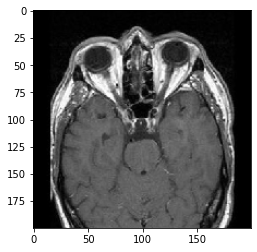

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X[0], cmap='gray')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,random_state=10,test_size=0.1)

In [26]:
x_train.shape

(1099, 120000)

In [27]:
x_test.shape

(123, 120000)

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [30]:
lg = LogisticRegression(C=0.1)
lg.fit(x_train, y_train)

LogisticRegression(C=0.1)

In [32]:
sv = SVC()
model=sv.fit(x_train, y_train)

In [35]:
print("Training Score:", lg.score(x_train, y_train))
print("Testing Score:", lg.score(x_test, y_test))

Training Score: 1.0
Testing Score: 0.967479674796748


In [34]:
print("Training Score:", sv.score(x_train, y_train))
print("Testing Score:", sv.score(x_test, y_test))

Training Score: 0.991810737033667
Testing Score: 0.959349593495935


In [37]:
pred = model.predict(x_test)

print(x_test.ndim)
print(x_test.shape)
pred
print(pred.ndim)

2
(123, 120000)
1


In [38]:
misclassified=np.where(y_test!=pred)
misclassified

(array([  3,  36,  51,  68, 120], dtype=int64),)

In [39]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],y_test[36])

Total Misclassified Samples:  5
0 1


(512, 512, 3)


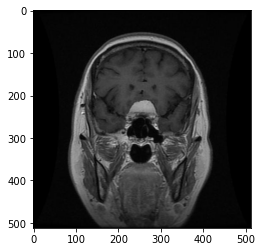

In [80]:
img=cv2.imread("image(82).jpg")
plt.imshow(img)
print(img.shape)

In [81]:
img

img =cv2.resize(img,(40000,1))
print(img.T)
print(img.ndim)
print(img.shape)
img=img.reshape(len(img),-1)
print(img.ndim)
print(img.shape)

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]
3
(1, 40000, 3)
2
(1, 120000)


In [82]:
pred = sv.predict(img)

In [83]:
pred

array([0])